## Introduction

In [1]:
# development libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

# Visual Settings
%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)
pd.set_option("display.float_format", lambda x:f"{x:,.4f}")

# Graphic style
plt.style.use("seaborn-v0_8")
sns.set_style("whitegrid")
sns.set_palette("Set1")

In [2]:
# importing the data
df = pd.read_csv('../data/raw/data.csv', encoding='unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.5500,"17,850.0000",United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.3900,"17,850.0000",United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.7500,"17,850.0000",United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.3900,"17,850.0000",United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.3900,"17,850.0000",United Kingdom


In [4]:
# information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# descriptive statistics
df.describe()

,Quantity,UnitPrice,CustomerID
count,"541,909.0000","541,909.0000","406,829.0000"
mean,9.5522,4.6111,"15,287.6906"
std,218.0812,96.7599,"1,713.6003"
min,"-80,995.0000","-11,062.0600","12,346.0000"
25%,1.0000,1.2500,"13,953.0000"
50%,3.0000,2.0800,"15,152.0000"
75%,10.0000,4.1300,"16,791.0000"
max,"80,995.0000","38,970.0000","18,287.0000"


In [6]:
# checking and dropping duplicates
df.duplicated().sum()

np.int64(5268)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

np.int64(0)

### Feature engineering

In [9]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [10]:
df['InvoiceDate'].info()

<class 'pandas.core.series.Series'>
Index: 536641 entries, 0 to 541908
Series name: InvoiceDate
Non-Null Count   Dtype         
--------------   -----         
536641 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.2 MB


In [11]:
df.query('Quantity < 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.5000,"14,527.0000",United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.6500,"15,311.0000",United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.6500,"17,548.0000",United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.2900,"17,548.0000",United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.2900,"17,548.0000",United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.8300,"14,397.0000",United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.6900,"15,498.0000",United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.9500,"15,311.0000",United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.2500,"17,315.0000",United Kingdom


- Valores negativos em **Quantity** muito provavelmente indica devoluções ou cancelamentos de pedidos. Nesse caso, esses itens não represetam vendas efetivas, e portanto serão removidos.

In [12]:
df.query('UnitPrice < 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,"-11,062.0600",NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,"-11,062.0600",NaN,United Kingdom


- Negative values ​​in **UnitPrice** do not make sense in a sale, values ​​equal to zero or negative may indicate incorrect data, or promotional items; but in this case, more specifically, they are Financial Adjustments.

In [13]:
# filtering values
df_copy = df.query('Quantity > 0')
df_copy = df_copy.query('UnitPrice > 0')

In [14]:
df_copy.query('Quantity < 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [15]:
df_copy.query('UnitPrice < 0')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [16]:
# creating a column of interest
df_copy['TotalPriceLineItem'] = df_copy['Quantity'] * df_copy['UnitPrice']
df_copy['TotalPriceLineItem'].describe()

count   524,878.0000
mean         20.2754
std         271.6936
min           0.0010
25%           3.9000
50%           9.9200
75%          17.7000
max     168,469.6000
Name: TotalPriceLineItem, dtype: float64

In [17]:
df_copy['TotalPriceLineItem'].count()

np.int64(524878)

- This is the number of valid transactions, i.e., items sold with quantity and price, after cleaning.

In [18]:
df_copy['TotalPriceLineItem'].mean()

np.float64(20.275398862211794)

- The average value per item sold in this sample is approximately £20.12.

In [19]:
df_copy['TotalPriceLineItem'].std()

np.float64(271.69356629922254)

- Very high deviation, which means that the dispersion of values is large. This is common in sales data, as some items may have values above the average.

In [20]:
df_copy['TotalPriceLineItem'].max()

np.float64(168469.6)

There are items with extremely high sales values, which only confirms the high dispersion and the presence of potential outliers, or items of large volume/value.

In [21]:
df_copy.UnitPrice.dtype

dtype('float64')

In [22]:
df_copy.TotalPriceLineItem.value_counts()

TotalPriceLineItem
15.0000       20211
2.4600         9275
17.7000        9232
1.2500         9065
4.1300         8811
              ...  
1,853.8000        1
1,581.0000        1
1,190.4000        1
1,170.0000        1
241.0800          1
Name: count, Length: 4906, dtype: int64

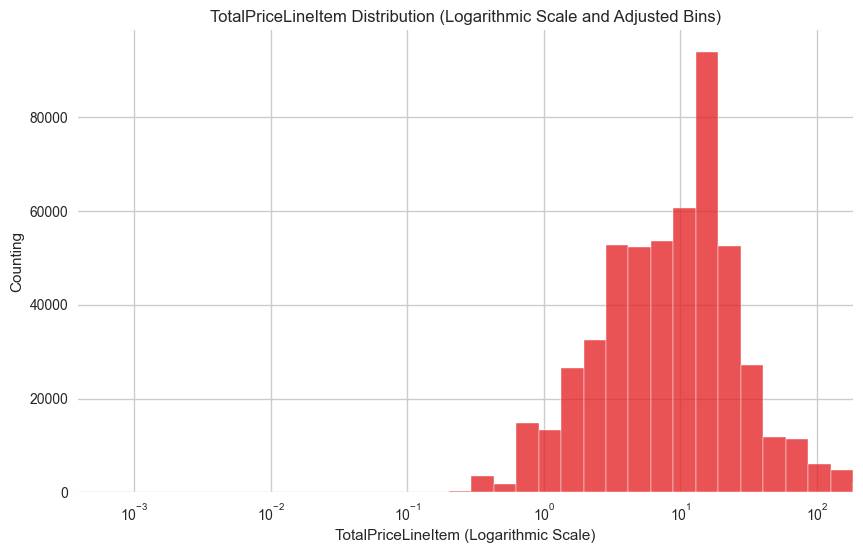

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['TotalPriceLineItem'], bins=50, log_scale=(True, False)) 
plt.xlim(0, df_copy['TotalPriceLineItem'].quantile(0.99))
plt.title('TotalPriceLineItem Distribution (Logarithmic Scale and Adjusted Bins)')
plt.xlabel('TotalPriceLineItem (Logarithmic Scale)')
plt.ylabel('Counting')
plt.show()

- **Insights**:  
 - Most line items have a total price between 1 and 100.
 - The trend (most common price value) for line items is in the range of 10 to 20.
 - Items with prices lower than 1 are rare, as are very high prices.


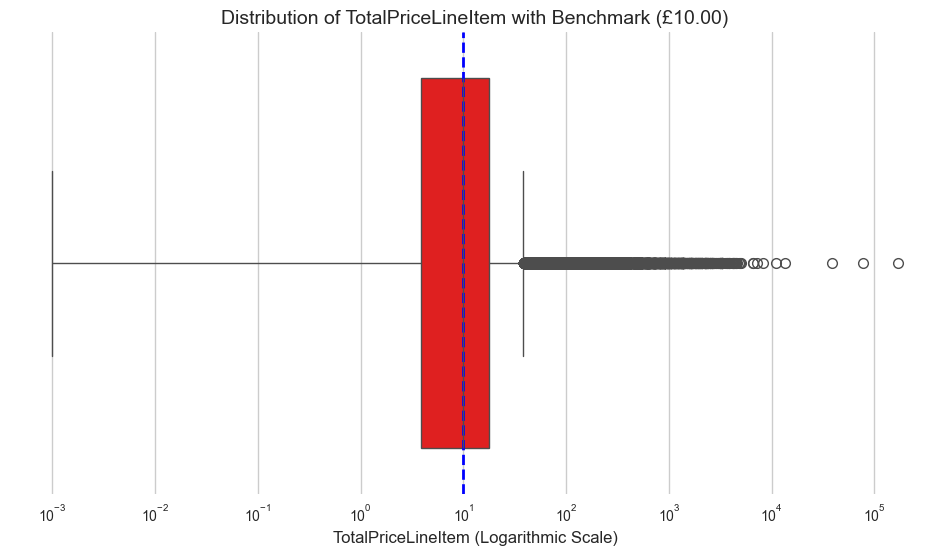

In [24]:
benchmark_value = 10.00


plt.figure(figsize=(12, 6))
sns.boxplot(data=df_copy, x='TotalPriceLineItem', color='red') 
plt.xscale('log')
plt.axvline(x=benchmark_value, color='blue', linestyle='--', linewidth=2, label=f'Benchmark: £{benchmark_value:.2f}')
plt.title('Distribution of TotalPriceLineItem with Benchmark (£10.00)', fontsize=14)
plt.xlabel('TotalPriceLineItem (Logarithmic Scale)', fontsize=12)
plt.show()

In [25]:
df_copy['TotalPriceLineItem'].median()

np.float64(9.92)

- From the median, it is possible to see that the highest concentration of data is in the low range, with the median being practically 10, i.e., 50% of transactions have relatively low values.
- The “whiskers” and multiple outliers on the right indicate a long tail of higher values, which are less frequent but do exist and extend up to 10^5.
- The £10.00 benchmark line is located at the upper edge or very close to the Third Quartile (Q3) of the red box. This means that approximately 75% (three-quarters) of TotalPriceLineItems are below or equal to the benchmark value of $10.00.
Only 25% (or less) of TotalPriceLineItems are above the benchmark, and that 25% includes the many outliers visible on the right.

# Hypothesis Testing

## Test t: Compare TotalPriceLineItem between the United Kingdom and Germany
**Why this type of analysis is good for business:**

E-commerce companies often tailor pricing, marketing, and product assortment strategies based on country. Knowing whether the average value of items sold varies significantly across markets is crucial for decision-making.

The results can indicate whether a country tends to purchase higher- or lower-value items, which can lead to further investigation into consumer behavior, purchasing power, or the success of specific products in different markets.

But before performing the two-sample independent t-test, let's check the assumptions that this test generally requires.


**1- Independence of observations:** Line item transactions from the United Kingdom and Germany are from different customers and purchase events.

**2- Continuous scale variable:** Monetary measurements are usually continuous.

**3- Normality of distribution for each group:** Check whether the distribution of the **TotalPriceLineItem** column is approximately normal in each group.

**4- Homogeneity of variances:** The variance of the study groups should be approximately equal in both groups (UK and Germany).

#### Normality Test

In [26]:
df_copy[df_copy['Country'] == 'United Kingdom']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPriceLineItem
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.5500,"17,850.0000",United Kingdom,15.3000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.3900,"17,850.0000",United Kingdom,20.3400
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.7500,"17,850.0000",United Kingdom,22.0000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.3900,"17,850.0000",United Kingdom,20.3400
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.3900,"17,850.0000",United Kingdom,20.3400
...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.9500,"15,804.0000",United Kingdom,23.4000
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.9500,"13,113.0000",United Kingdom,23.6000
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.2500,"13,113.0000",United Kingdom,30.0000
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.9500,"13,113.0000",United Kingdom,214.8000


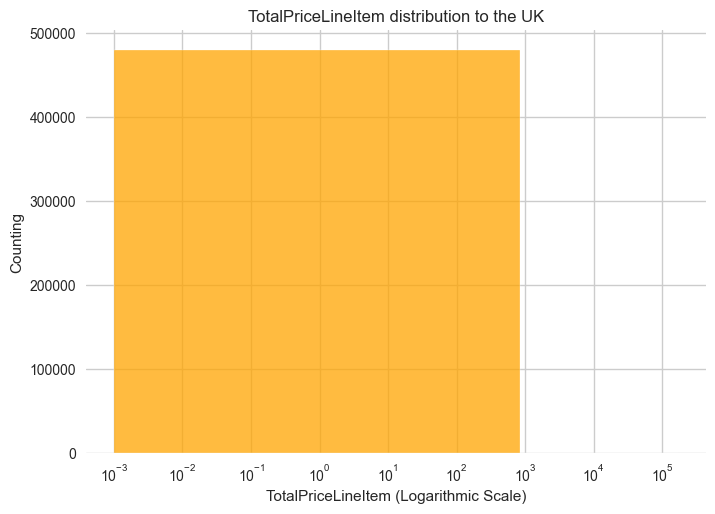

In [27]:
uk = df_copy[df_copy['Country'] == 'United Kingdom']

sns.histplot(uk, x='TotalPriceLineItem', bins=200, color='Orange')
plt.title('TotalPriceLineItem distribution to the UK')
plt.xlabel('TotalPriceLineItem (Logarithmic Scale)')
plt.ylabel('Counting')
plt.xscale('log')
plt.show()

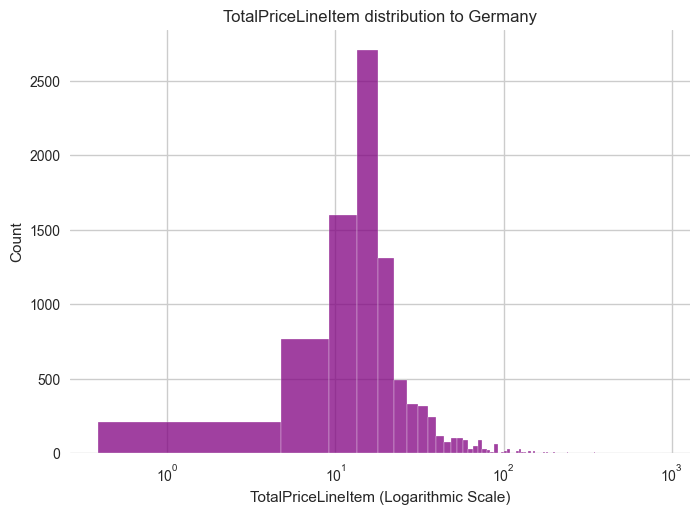

In [28]:
gm = df_copy[df_copy['Country'] == 'Germany']

sns.histplot(gm, x='TotalPriceLineItem', bins=200, color='Purple')
plt.title('TotalPriceLineItem distribution to Germany')
plt.xlabel('TotalPriceLineItem (Logarithmic Scale)')
plt.xscale('log')
plt.show()

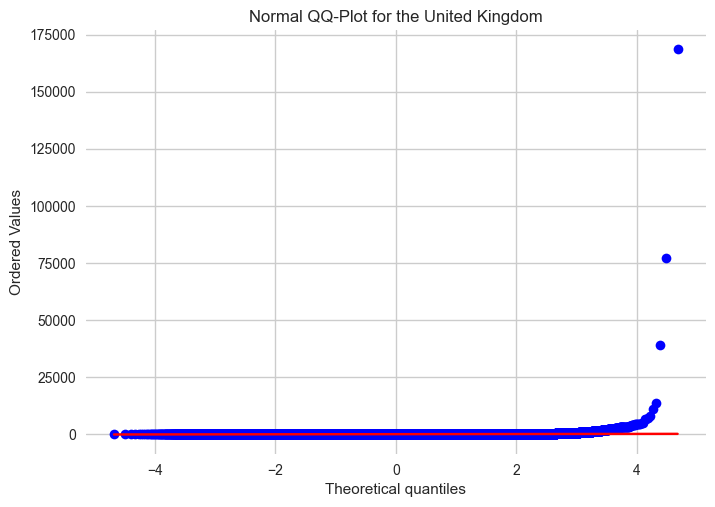

In [29]:
from scipy import stats

stats.probplot(uk['TotalPriceLineItem'], dist='norm', plot=plt)
plt.title('Normal QQ-Plot for the United Kingdom')
plt.show()

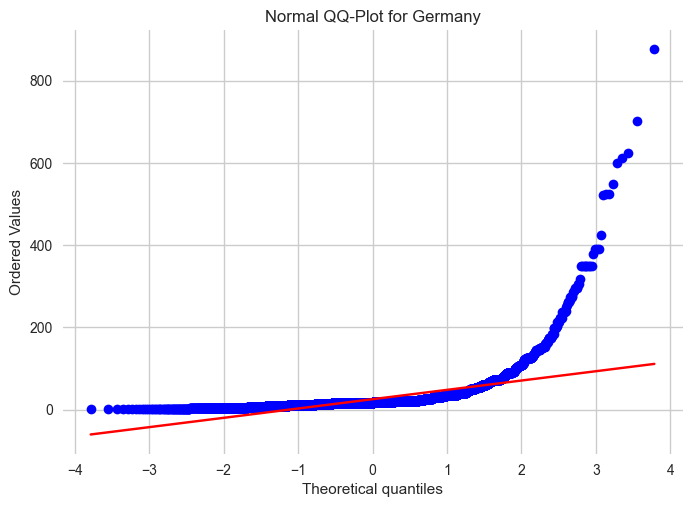

In [30]:
stats.probplot(gm['TotalPriceLineItem'], dist='norm', plot=plt)
plt.title('Normal QQ-Plot for Germany')
plt.show()

### Numerical normality tests

In [31]:
from statsmodels.stats.diagnostic import lilliefors

alpha = 0.05

stats_test, p_value = lilliefors(uk['TotalPriceLineItem'], dist='norm')

print('Lilliefors normality test')
if p_value < alpha:
    print(f'Reject the null hypothesis of normality for the United Kingdom, p-valor: {p_value}')
else:
    print(f'Do not reject the null hypothesis of normality for the United Kingdom, p-valor: {p_value}')

Lilliefors normality test
Reject the null hypothesis of normality for the United Kingdom, p-valor: 0.0009999999999998899


In [32]:
stats_test, p_value = lilliefors(gm['TotalPriceLineItem'], dist='norm')

print('Lilliefors normality test')
if p_value < alpha:
    print(f'Reject the null hypothesis of normality for Germany, p-valor: {p_value}')
else:
    print(f'Do not reject the null hypothesis of normality for the Germany, p-valor: {p_value}')

Lilliefors normality test
Reject the null hypothesis of normality for Germany, p-valor: 0.0009999999999998899


In [33]:
result_ad_norm = stats.anderson(uk['TotalPriceLineItem'], dist='norm')


print('Anderson-Darling normality test')

if result_ad_norm.statistic > result_ad_norm.critical_values[2]: # 2 is the index for 5%
    print("Reject the null hypothesis of normality for the United Kingdom.")
else:
    print("Do not reject the null hypothesis of normality for the United Kingdom.")

Anderson-Darling normality test
Reject the null hypothesis of normality for the United Kingdom.


In [34]:
result_ad_norm = stats.anderson(gm['TotalPriceLineItem'], dist='norm')


print('Anderson-Darling normality test')
if result_ad_norm.statistic > result_ad_norm.critical_values[2]: # 2 is the index for 5%
    print("Reject the null hypothesis of normality for the Germany.")
else:
    print("Do not reject the null hypothesis of normality for the Germany.")

Anderson-Darling normality test
Reject the null hypothesis of normality for the Germany.


In [35]:

statistic_ks_norm, p_value_ks_norm = stats.kstest(uk['TotalPriceLineItem'], 'norm')

print('Kolmogorov-Smirnov (KS) normality test')
if p_value_ks_norm < 0.05:
    print("Reject the null hypothesis of normality for the United Kingdom.")
else:
    print("Do not reject the null hypothesis of normality for the United Kingdom.")

Kolmogorov-Smirnov (KS) normality test
Reject the null hypothesis of normality for the United Kingdom.


In [36]:

statistic_ks_norm, p_value_ks_norm = stats.kstest(gm['TotalPriceLineItem'], 'norm')


print('Kolmogorov-Smirnov (KS) normality test')
if p_value_ks_norm < 0.05:
    print("Reject the null hypothesis of normality for the Germany.")
else:
    print("Do not reject the null hypothesis of normality for the Germany.")

Kolmogorov-Smirnov (KS) normality test
Reject the null hypothesis of normality for the Germany.


## Homocedasticity test

In [37]:
statistic_levene_equal, pvalue_levene_equal = stats.levene(uk['TotalPriceLineItem'], gm['TotalPriceLineItem'])

print('Testing de Levene')
if pvalue_levene_equal < alpha:
    print("Reject the null hypothesis of equality between variances.")
else:
    print("Do not reject the null hypothesis of equality between variances.")

Testing de Levene
Do not reject the null hypothesis of equality between variances.


In [38]:
statistic_bartlett_equal, pvalue_bartlett_equal = stats.bartlett(uk['TotalPriceLineItem'], gm['TotalPriceLineItem'])

print('Testing the Barlett')
if pvalue_bartlett_equal < alpha:
    print("Reject the null hypothesis of equality between variances.")
else:
    print("Do not reject the null hypothesis of equality between variances.")


Testing the Barlett
Reject the null hypothesis of equality between variances.


In [39]:
uk_prices = df_copy[df_copy['Country'] == 'United Kingdom']['TotalPriceLineItem']
germany_prices = df_copy[df_copy['Country'] == 'Germany']['TotalPriceLineItem']

print(f'Number of Line Items for the United Kingdom: {len(uk_prices)}')
print(f'Number of line items for Germany: {len(germany_prices)}')

Number of Line Items for the United Kingdom: 479985
Number of line items for Germany: 9025


In [40]:
t_stat_A_student, p_value_A_student = stats.ttest_ind(uk_prices, germany_prices, equal_var=True)

print("Scenario A: Equal Variances")

if p_value_A_student < alpha:
    print("We reject the null hypothesis; there is a significant difference in the means.")
else:
    print("We do not reject the null hypothesis; there is insufficient evidence to say that the means are different.")


Scenario A: Equal Variances
We reject the null hypothesis; there is a significant difference in the means.


## Welch testing

In [41]:
t_stat_B_welch, p_value_B_welch = stats.ttest_ind(uk_prices, germany_prices, equal_var=False)

print("Scenario B: Different Variances")

if p_value_B_welch < alpha:
    print("We reject the null hypothesis; there is a significant difference in the means.")
else:
    print("We do not reject the null hypothesis; there is insufficient evidence to say that the means are different.")

Scenario B: Different Variances
We reject the null hypothesis; there is a significant difference in the means.


### post-test

In [42]:
def calculate_cohens_d(data1, data2):
    n1, n2 = len(data1), len(data2)
    mean1, mean2 = np.mean(data1), np.mean(data2)
    std1, std2 = np.std(data1, ddof=1), np.std(data2, ddof=1)

    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

    cohens_d = (mean1 - mean2) / pooled_std
    return cohens_d

In [43]:
cohens_d_value = calculate_cohens_d(uk_prices, germany_prices)


print(f"Cohen's d: {cohens_d_value:.2f}")
if abs(cohens_d_value) < 0.2:
    interpretation = "very small (negligible in practice)"
elif abs(cohens_d_value) < 0.5:
    interpretation = "small"
elif abs(cohens_d_value) < 0.8:
    interpretation = "medium"
else:
    interpretation = "large"

print(f"The magnitude of the effect (Cohen's d) is considered {interpretation}.")

Cohen's d: -0.02
The magnitude of the effect (Cohen's d) is considered very small (negligible in practice).


In [46]:
uk_prices.mean(), germany_prices.mean()

(np.float64(18.754219598529122), np.float64(25.338326869806092))

## **Comparative Analysis: Average Value per Item (TotalPriceLineItem) - United Kingdom vs. Germany**

### **1. The Business Challenge: Understanding Market Differences**

Our e-commerce company operates in several markets, and understanding the small differences between each one is essential. Our goal with this analysis was to investigate whether there is a **significant difference in the average value per item sold (`TotalPriceLineItem`) between two of our largest key markets: the United Kingdom and Germany.**

Knowing whether a country tends to purchase higher or lower value items can directly influence our strategies for:
*   **Pricing:** Adjusting offers and promotions.
*   **Marketing:** Targeting campaigns.
*   **Product Portfolio:** Prioritizing luxury or entry-level items.
*   **Logistics:** Optimizing inventory and distribution.

### **2. Analysis Approach: Statistical Power**

To ensure the robustness of our conclusions, we applied a rigorous statistical methodology:
*   **Data Preparation:** We analyzed the distribution of `TotalPriceLineItem` data for both countries. We identified that, although the raw data does not follow a normal distribution (as is common in financial and sales data), the large volume of transactions (approximately 480,000 for the United Kingdom and 10,000 for Germany) allows us to use robust tests that reliably compare the means.
*   **Hypothesis Testing:** We used Welch's t-test, a statistical tool suitable for comparing the means of two groups, even when the variances are different and the data are not perfectly normal.

### **3. Analysis Results:**

Our analysis led us to two main conclusions, which should be interpreted together:

#### **A) Statistically Significant Difference (p-value < 0.05)**

*   **What this means:** Statistical methods have shown that there is indeed a **statistically significant difference** in the `TotalPriceLineItem` averages between the United Kingdom and Germany. This means that the resulting difference is not random.
*   **The Context:** Because we have a large amount of data for both groups, especially the United Kingdom, even a small variation between the groups can be detected (noise) as being “statistically significant.”

#### **B) Practically Insignificant Difference (Cohen's d = -0.02)**

*   **What this means:** To understand the *magnitude* of this detected difference, we calculated **Cohen's d**, a measure of “effect size.” The value of **-0.02** indicates a **very small, practically insignificant difference.**
*   **In simple terms:** Although there is a small statistical fluctuation between the averages, in practice, this difference is so minimal that it has no relevant impact on business decisions or operations. Practically speaking, the average amount spent per Line Item is virtually the same in both countries.

> **Averages for Context (Example - you would use your actual averages here):**
> *   **United Kingdom:** Average `TotalPriceLineItem` = £18.75
> *   **Germany:** Average `TotalPriceLineItem` = £25.34
> *(The difference between $25.34 and $35.00 is so small that Cohen's d classified it as insignificant.)*

### **4. Business Implications and Recommendations**

Based on these results, our recommendations are:

*   **Do Not Overreact to the Difference:** The small differences observed in the average value per item, although statistically present, **are not large enough to justify significant strategic changes** in pricing policies or product portfolio between the United Kingdom and Germany *based solely on this metric*.
*   **Focus on Other Performance Drivers:** Sales performance and customer behavior in each country are likely to be influenced more by factors other than average value per item, such as:
*   **Purchases:** Frequency of purchase.
    *   **Total average ticket:** Total value of the shopping basket.
*   **Specific product types:** Which product categories are most popular in each market.
    * **Marketing campaigns:** Effectiveness of localized promotions.
* **Local competition.**
* **Maintain Unified Strategies (in this metric):** For `TotalPriceLineItem`, strategies can remain relatively unified unless other analyses reveal more relevant differences in other metrics.

### **5. Conclusion: Distinguishing the “Significant” from the “Practical”**

This analysis highlights the importance of looking beyond statistical significance. Although our tests detect small variations, the **effect size** is what truly informs us about the practical relevance of a finding. In this case, the difference in the mean value per item between the United Kingdom and Germany is so small that, for strategic and operational purposes, it can be considered insignificant.